In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datas  = pd.read_csv('/content/2_5298579412227218683.csv')
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [3]:
X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X, y)

LinearRegression()

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)


LinearRegression()

In [6]:
X.shape

(6, 1)

In [7]:
X_poly.shape

(6, 5)

Text(0, 0.5, 'Pressure')

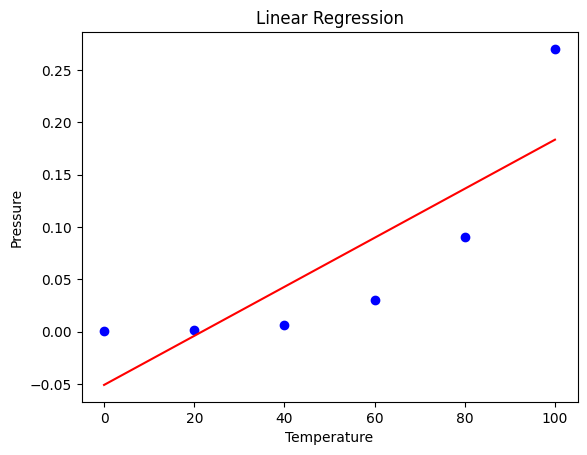

In [8]:
plt.scatter(X, y, color='blue')
plt.plot(X, lin2.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

Text(0, 0.5, 'Pressure')

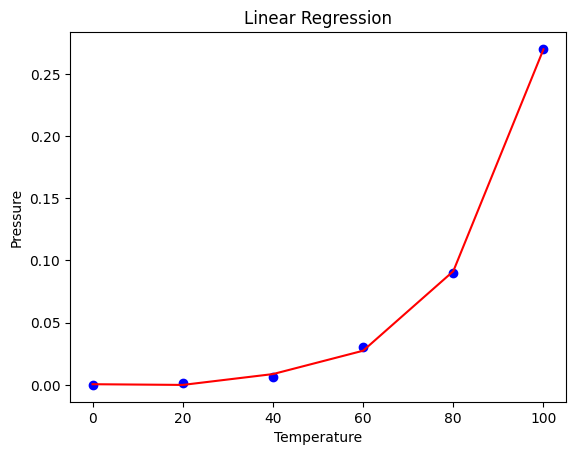

In [12]:
plt.scatter(X, y, color='blue')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color='red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [14]:
diabets = load_diabetes()
X, y = diabets.data, diabets.target

y_binary = (y > np.median(y)).astype(int)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.4, random_state=42)


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
model = LogisticRegression(max_iter=300, tol=0.001, verbose=1, solver='liblinear')
model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(max_iter=300, solver='liblinear', tol=0.001, verbose=1)

In [21]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.53%


In [22]:
print('Confusion MAtrix\n', confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion MAtrix
 [[70 21]
 [17 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79        91
           1       0.77      0.80      0.78        86

    accuracy                           0.79       177
   macro avg       0.79      0.79      0.79       177
weighted avg       0.79      0.79      0.79       177



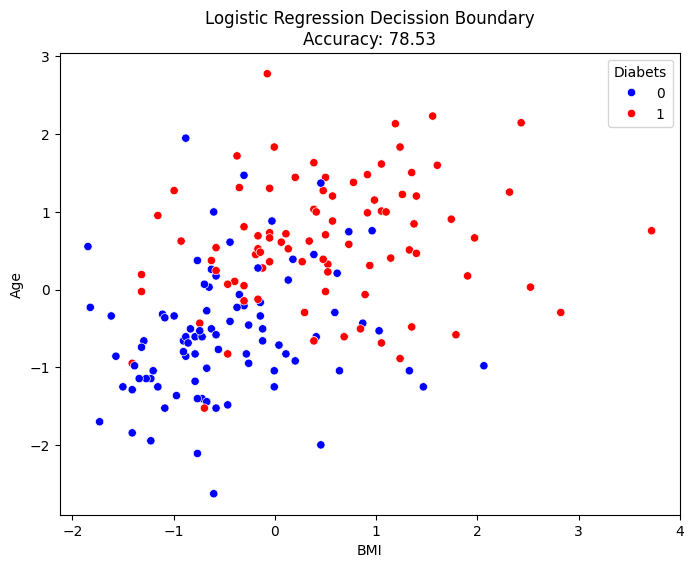

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
    0: 'blue', 1: 'red'}, marker='o'
                )
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Logistic Regression Decission Boundary\nAccuracy: {:.2f}'.format(accuracy * 100))
plt.legend(title='Diabets', loc='upper right')
plt.show()